## 实验：自动化数据洞察

**注意**：ChatGPT 最大的优势在于支持会话上下文的关联与交互性。因此，你没必要要求 ChatGPT 一次性的给你提供所有完整的回答。而应该通过多次提问与交互，使 ChatGPT 更进一步的明确你的指令，并提供你所需要的信息。

### 本地环境配置

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'    # 用来正常显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 设置正常显示符号

# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 忽略第三方支援库更新兼容性提示
import warnings
warnings.simplefilter('ignore') 

### 指令格式

- 请作为一位数据分析师，对下面这一份 **<font color="#0000dd">[数据集类型]</font>** 进行分析，请输出你的数据洞察结论 ——

**<font color="#0000dd">[原始数据集]</font>**

- 请提供详细的 Python 分析代码与说明
- 请提供相关数据洞察结论的可视化分析代码

### 指令示例

- 请作为一位数据分析师，对下面这一份 **[供应链数据集]** 进行分析，请输出你的数据洞察结论 ——
```
原始数据集
```
- 请提供详细的 Python 分析代码与说明
- 请提供相关数据洞察结论的可视化分析代码

<img src="./img/4-4.png" width=80%>

### ChatGPT 代码测试

供应链数据集分析结论：

1. 供应链数据集包含了一些物流运输的信息，包括日期、货物种类、货物数量、客户类型、目的地、费用等等。
2. 从月份的角度看，1月和2月的运输货物是木材和沙子，3月变成了铁矿石。
3. 客户类型分为新客户和留存客户，留存客户更多，其中有些客户多次进行运输。
4. 目的地分别是Nunavut、British Columbia、Manitoba、New Brunswick等地。
5. 运输的费用包括多种项，如费率、卡车、保险、燃料、高速公路费、维修等。
6. 司机的名字和里程数也被记录下来。
7. 数据集中的一些指标可以用来计算成本和收益，如里程数、每英里费用、额外停靠次数和费用等。
8. 通过对数据进行分析，可以找出哪些客户是最有价值的，哪些区域最有潜力，哪些司机效率最高等等，为优化物流运输和提高盈利能力提供参考。

由于数据量较小，我们可以使用 Pandas 进行数据读取和分析。

首先，我们需要导入 Pandas 库，并读取数据集：

In [2]:
import pandas as pd

df = pd.read_csv(data_path + 'supply_chain.csv')

接着，我们可以查看数据集的基本信息：

In [3]:
print(df.head())        # 查看前 5 行数据

  Month  Day  Load  Tonnage       Customer Type       Destination    Rate  \
0   Jan    1  Wood     11.0  Retaining Customer          Nunavut.  5556.0   
1   Jan    3  Wood     21.3  Retaining Customer  British Columbia  5556.0   
2   Jan   13  Wood     22.0  Retaining Customer          Manitoba  5556.0   
3   Feb    4  Sand     14.5  Retaining Customer  British Columbia  4567.0   
4   Feb    5  Sand     18.0  Retaining Customer          Manitoba  4567.0   

                   Truck  Insurance   Fuel  ...  Rate Per Miles  Extra Stops  \
0  Freightliner Sprinter      132.0  400.0  ...           240.0        100.0   
1  Freightliner Sprinter      132.0  400.0  ...           240.0        100.0   
2  Freightliner Sprinter      132.0  400.0  ...           240.0        100.0   
3  Freightliner Sprinter      132.0  333.0  ...           248.0        100.0   
4  Freightliner Sprinter      132.0  333.0  ...           248.0        100.0   

   Extra Pay  Costs Driver Paid  Total Expenses  First c

In [4]:
print(df.info())        # 查看数据集信息，包括列名、数据类型、非空数量等

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    61 non-null     object 
 1   Day                      61 non-null     int64  
 2   Load                     61 non-null     object 
 3   Tonnage                  61 non-null     float64
 4   Customer Type            61 non-null     object 
 5   Destination              61 non-null     object 
 6   Rate                     61 non-null     float64
 7   Truck                    61 non-null     object 
 8   Insurance                61 non-null     float64
 9   Fuel                     61 non-null     float64
 10  Diesel Exhaust Fluid     61 non-null     float64
 11  Advance                  61 non-null     float64
 12  Warehouse                61 non-null     float64
 13  Repairs                  39 non-null     float64
 14  Tolls                    61 

In [5]:
print(df.describe())    # 查看数据集的基本统计信息，包括均值、标准差、最小值、最大值等

             Day    Tonnage         Rate  Insurance        Fuel  \
count  61.000000  61.000000    61.000000       61.0   61.000000   
mean   15.524590  17.177049  5885.868852      132.0  388.852459   
std     8.779914   3.734943  1554.139735        0.0   44.944720   
min     1.000000  11.000000  3456.000000      132.0  245.000000   
25%     8.000000  13.000000  4782.000000      132.0  399.000000   
50%    17.000000  18.000000  5556.000000      132.0  400.000000   
75%    23.000000  21.000000  6778.000000      132.0  400.000000   
max    29.000000  23.000000  8765.000000      132.0  453.000000   

       Diesel Exhaust Fluid  Advance   Warehouse    Repairs       Tolls  ...  \
count             61.000000     61.0   61.000000  39.000000   61.000000  ...   
mean              51.868852    250.0  127.622951  56.794872  120.852459  ...   
std                5.261417      0.0    6.408754  14.162923   28.390043  ...   
min               50.000000    250.0  120.000000  32.000000   51.000000  ...

接下来，我们可以根据业务需求进行数据分析。下面给出一些可能的数据洞察结论及其实现代码：

#### 1. 每月货运量和总收入

In [6]:
# 按月份分组，计算每月的货运量和总收入
monthly_data = df.groupby('Month').agg({'Load': 'sum', 'Final Amount': 'sum'})

# 显示结果
print(monthly_data)

                                                   Load  Final Amount
Month                                                                
Apr                                        WoodSandWood        5790.0
Aug                                    SandSandSandSand        7852.0
Dec                                        WoodWoodWood        4758.0
Feb                                    SandSandSandSand        5480.0
Jan                                        WoodWoodWood        5001.0
Jul    WoodWoodWoodWoodWoodWoodWoodWoodWoodWoodWoodWood       24396.0
Jun                                    IronIronIronIron        6520.0
Mar                                IronIronSandIronWood        5185.0
May                                    SandSandSandIron       10520.0
Nov                                IronIronIronIronIron        7175.0
Oct            WoodWoodWoodSandWoodSandSandSandWoodWood       14676.0
Sep                                    WoodWoodWoodWood       10360.0


#### 2. 每月的平均运输里程和平均运输成本

In [7]:
# 按月份分组，计算每月的平均运输里程和平均运输成本
df['Miles'] = df['Miles'].astype(float)
df['Total Expenses'] = df['Total Expenses'].astype(float)
monthly_data = df.groupby('Month').agg({'Miles': 'mean', 'Total Expenses': 'mean'})

# 显示结果
print(monthly_data)

       Miles  Total Expenses
Month                       
Apr    343.0     1593.333333
Aug    389.0     1533.500000
Dec    343.0     1530.000000
Feb    354.0     1532.500000
Jan    343.0     1573.000000
Jul    377.0     1612.166667
Jun    343.0     1409.000000
Mar    333.0     1563.600000
May    343.0     1579.000000
Nov    399.0     1618.000000
Oct    343.0     1549.100000
Sep    234.0     1448.000000


#### 3. 不同客户类型的平均运输成本和收入

In [8]:
# 按客户类型分组，计算不同客户类型的平均运输成本和收入
customer_data = df.groupby('Customer Type').agg({'Total Expenses': 'mean', 'Final Amount': 'mean'})

# 显示结果
print(customer_data)

                    Total Expenses  Final Amount
Customer Type                                   
New Customer           1569.090909   1760.272727
Retaining Customer     1551.640000   1767.000000


#### 4. 不同目的地的平均运输成本和收入

In [9]:
# 按目的地分组，计算不同目的地的平均运输成本和收入
destination_data = df.groupby('Destination').agg({'Total Expenses': 'mean', 'Final Amount': 'mean'})

# 显示结果
print(destination_data)

                  Total Expenses  Final Amount
Destination                                   
Alberta              1575.750000   1766.500000
British Columbia     1556.500000   1683.833333
Manitoba             1551.200000   1729.000000
New Brunswick        1540.857143   1903.285714
Nova Scotia          1505.800000   1956.600000
Nunavut              1564.851852   1724.111111
Nunavut.             1573.000000   1667.000000
Yukon                1549.000000   1930.000000


#### 5. 不同货物类型的平均运输成本和收入

In [10]:
# 按货物类型分组，计算不同货物类型的平均运输成本和收入
cargo_data = df.groupby('ERE Stage').agg({'Total Expenses': 'mean', 'Final Amount': 'mean'})

# 显示结果
print(cargo_data)

           Total Expenses  Final Amount
ERE Stage                              
588.0         1551.444444        1037.0
776.0         1532.500000        1370.0
813.0         1618.000000        1435.0
899.0         1530.000000        1586.0
923.0         1409.000000        1630.0
945.0         1573.000000        1667.0
1094.0        1566.800000        1930.0
1112.0        1533.500000        1963.0
1152.0        1612.166667        2033.0
1468.0        1448.000000        2590.0
1490.0        1579.000000        2630.0


以上代码仅是简单示例，实际应用中可能需要更多的数据清洗、特征工程和可视化分析。同时，根据具体业务需求，也可以通过修改上述代码来实现更多的数据洞察结论。

#### 各月份装载量和吨位的比较

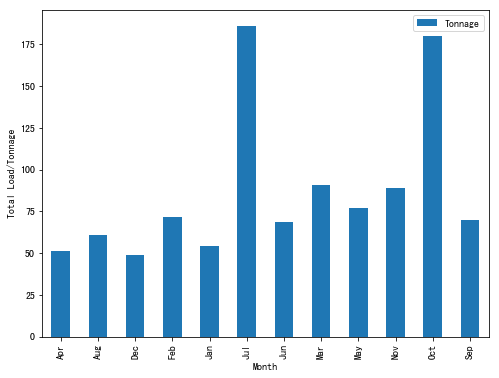

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(data_path + 'supply_chain.csv')

# 计算每个月的总装载量和总吨位
monthly_totals = df.groupby('Month').agg({'Load': 'sum', 'Tonnage': 'sum'})

# 可视化月度总装载量和总吨位
ax = monthly_totals.plot(kind='bar', figsize=(8,6))
ax.set_xlabel('Month')
ax.set_ylabel('Total Load/Tonnage')
plt.show()

#### 各省份的平均费率

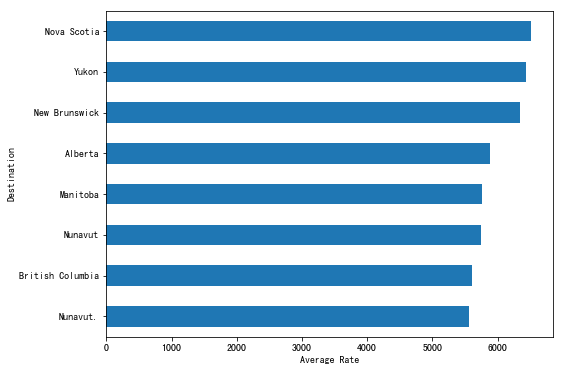

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(data_path + 'supply_chain.csv')

# 计算每个省份的平均费率
avg_rates = df.groupby('Destination')['Rate'].mean().sort_values()

# 可视化平均费率
ax = avg_rates.plot(kind='barh', figsize=(8,6))
ax.set_xlabel('Average Rate')
plt.show()

#### 不同客户类型的平均费用

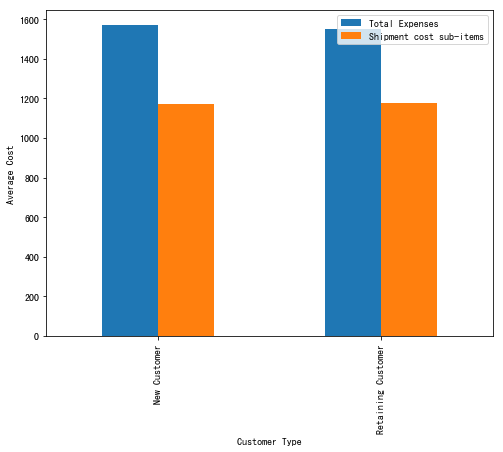

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(data_path + 'supply_chain.csv')

# 计算每种客户类型的平均费用
avg_costs = df.groupby('Customer Type').mean()[['Total Expenses', 'Shipment cost sub-items']]

# 可视化平均费用
ax = avg_costs.plot(kind='bar', figsize=(8,6))
ax.set_xlabel('Customer Type')
ax.set_ylabel('Average Cost')
plt.show()